In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from csc.workbench import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


b=0.01, y=0.01, s=1.35e-05
b=0.01, y=0.01, s=1.98e-05
b=0.01, y=0.01, s=2.77e-05
b=0.01, y=0.02, s=3.74e-05
b=0.01, y=0.02, s=4.91e-05
b=0.01, y=0.02, s=6.29e-05
b=0.01, y=0.02, s=7.88e-05
b=0.01, y=0.02, s=9.70e-05
b=0.01, y=0.03, s=1.18e-04
b=0.01, y=0.03, s=1.41e-04
b=0.01, y=0.03, s=1.66e-04
b=0.01, y=0.03, s=1.95e-04
b=0.01, y=0.03, s=2.26e-04
b=0.01, y=0.01, s=1.13e-05
b=0.01, y=0.01, s=1.50e-05
b=0.01, y=0.01, s=1.95e-05
b=0.01, y=0.02, s=2.48e-05
b=0.01, y=0.02, s=3.10e-05
b=0.01, y=0.02, s=3.82e-05
b=0.01, y=0.02, s=4.65e-05
b=0.01, y=0.02, s=5.59e-05
b=0.01, y=0.03, s=6.65e-05
b=0.01, y=0.03, s=7.84e-05
b=0.01, y=0.03, s=9.15e-05
b=0.01, y=0.03, s=1.06e-04
b=0.01, y=0.03, s=1.22e-04
b=0.01, y=0.01, s=1.17e-05
b=0.01, y=0.01, s=1.50e-05
b=0.01, y=0.01, s=1.87e-05
b=0.01, y=0.02, s=2.29e-05
b=0.01, y=0.02, s=2.76e-05
b=0.01, y=0.02, s=3.29e-05
b=0.01, y=0.02, s=3.88e-05
b=0.01, y=0.02, s=4.55e-05
b=0.01, y=0.03, s=5.29e-05
b=0.01, y=0.03, s=6.12e-05
b=0.01, y=0.03, s=7.02e-05
b

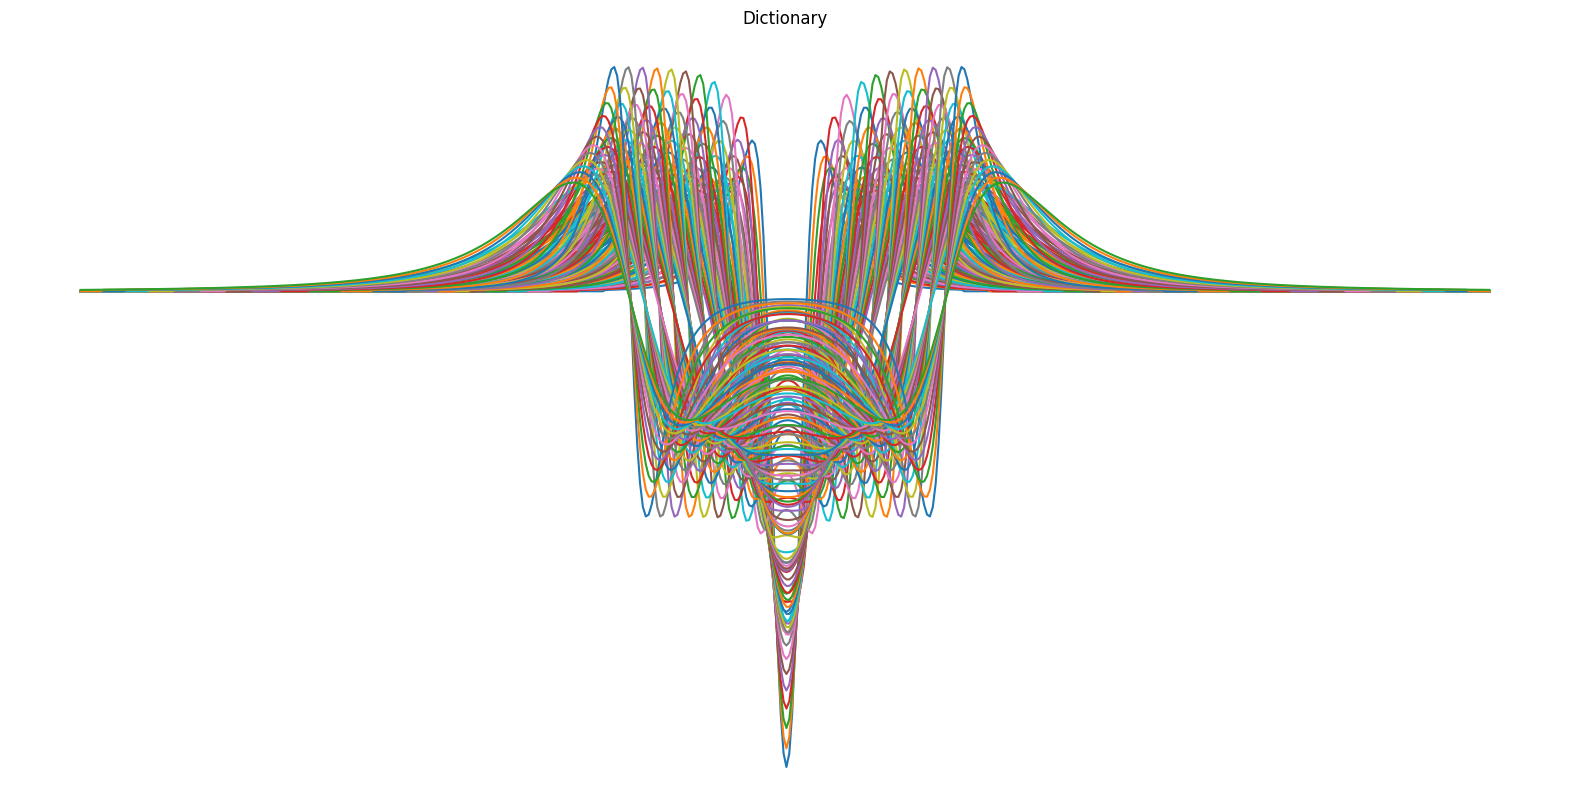

In [7]:
atoms = dictionary.getAtoms()

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
for atom in atoms:
    ax.plot(atom())
    print('b={:.2f}, y={:.2f}, s={:.2e}'.format(atom.b, atom.y, atom.sigma))

plt.title('Dictionary')
plt.axis('off')
plt.show()

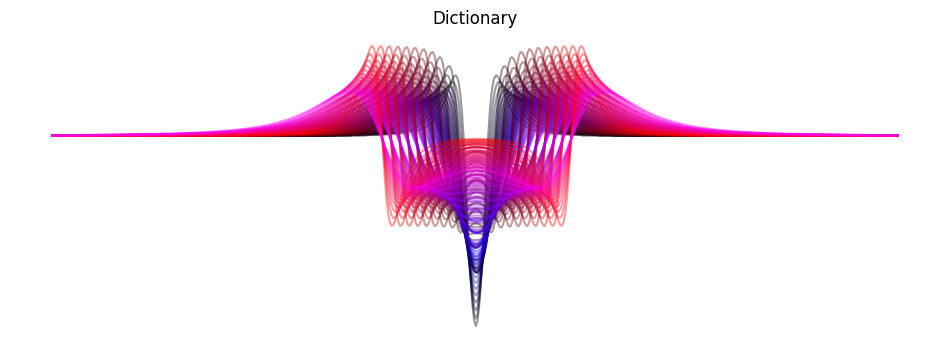

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que atoms est une liste d'objets avec les attributs b, y, et une méthode pour obtenir les valeurs y (par exemple, une fonction ou un tableau)
atoms = dictionary.getAtoms()  # Votre méthode existante pour obtenir les atomes

# Créer la figure et l'axe
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# Déterminer les limites pour les paramètres b et y pour normaliser les valeurs de couleur
b_vals = [atom.b for atom in atoms]
y_vals = [atom.y for atom in atoms]
b_min, b_max = min(b_vals), max(b_vals)
y_min, y_max = min(y_vals), max(y_vals)

# Fonction de normalisation des valeurs
normalize_b = lambda b: (b - b_min) / (b_max - b_min)
normalize_y = lambda y: (y - y_min) / (y_max - y_min)

# Parcourir chaque atome et tracer avec une couleur basée sur b et y
for atom in atoms:
    # Normaliser b et y pour l'échelle de couleur
    norm_b = normalize_b(atom.b)
    norm_y = normalize_y(atom.y)
    # Utiliser une couleur RGB où R = b, B = y, et G = 0 pour simplifier
    color = (norm_b, 0, norm_y)
    ax.plot(atom(), color=color, alpha=0.4)  # Supposer que `atom()` retourne les valeurs de l'atome

plt.title('Dictionary')
plt.axis('off')
plt.show()


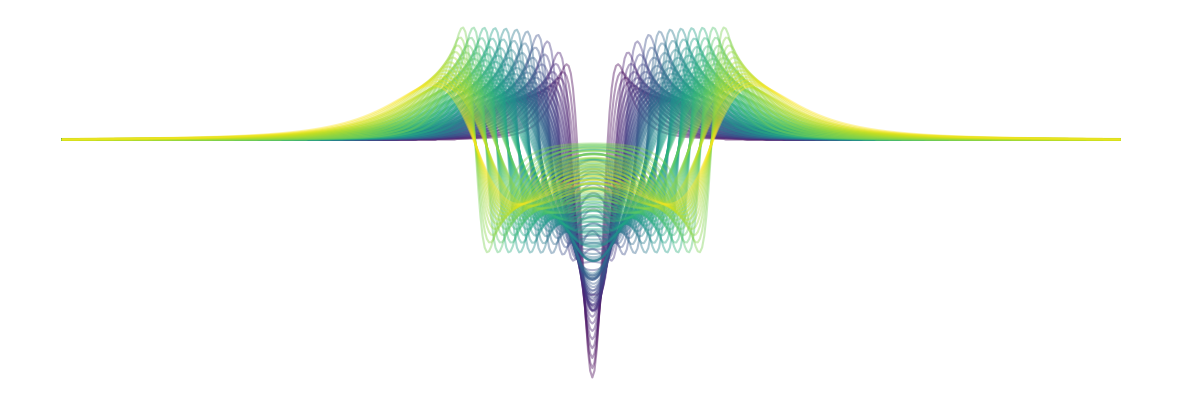

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que atoms est une liste d'objets avec les attributs b, y, et une méthode pour obtenir les valeurs y
atoms = dictionary.getAtoms()

# Créer la figure et l'axe
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Déterminer les limites pour les paramètres b et y pour créer une échelle
b_vals = [atom.b for atom in atoms]
y_vals = [atom.y for atom in atoms]
b_min, b_max = min(b_vals), max(b_vals)
y_min, y_max = min(y_vals), max(y_vals)

# Utiliser la fonction linspace pour créer une échelle de couleurs qui combine b et y
b_y_scale = np.linspace(0, 1, len(atoms))
colors = plt.cm.viridis(b_y_scale)  # Utiliser la palette de couleurs 'viridis'

# Parcourir chaque atome et tracer avec une couleur de la palette
for atom, color in zip(atoms, colors):
    norm_b = (atom.b - b_min) / (b_max - b_min)
    norm_y = (atom.y - y_min) / (y_max - y_min)
    # Calculer une valeur de couleur basée sur la combinaison normalisée de b et y
    color_val = norm_b * 0.8 + norm_y * 0.2  # Exemple de combinaison
    ax.plot(atom(), color=plt.cm.viridis(color_val), alpha=0.4)  # Appliquer la couleur basée sur viridis

plt.axis('off')
plt.show()


C:\Users\gomes\AppData\Local\Temp\ipykernel_9044\1839302575.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  selected_palette = plt.cm.get_cmap(color_palettes[palette_index])


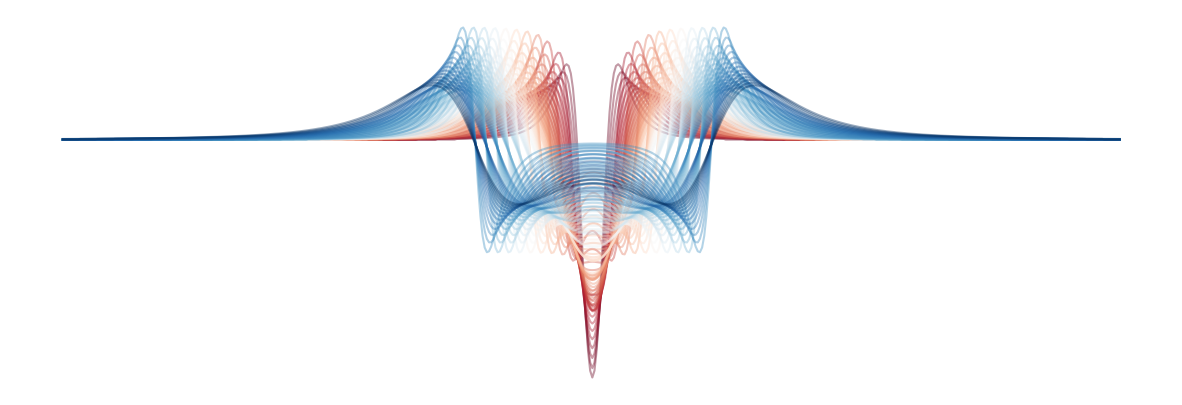

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des palettes disponibles
color_palettes = [
    'viridis', 'plasma', 'inferno', 'magma', 'cividis',
    'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
    'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
    'GnBu', 'PuBu', 'PuBuGn', 'BuGn', 'RdBu', 'RdGy', 'PiYG', 'RdPuBu', 'PuBuRd'
]

def plot_atoms(atoms, palette_index=0, alpha=0.4, figsize=(15, 5)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # Sécurité pour éviter les erreurs d'index
    if palette_index >= len(color_palettes) or palette_index < 0:
        palette_index = 0  # Revenir à la palette par défaut si l'index est hors des limites

    # Déterminer les limites pour les paramètres b et y
    b_vals = [atom.b for atom in atoms]
    y_vals = [atom.y for atom in atoms]
    b_min, b_max = min(b_vals), max(b_vals)
    y_min, y_max = min(y_vals), max(y_vals)

    # Fonction de normalisation
    normalize_b = lambda b: (b - b_min) / (b_max - b_min)
    normalize_y = lambda y: (y - y_min) / (y_max - y_min)

    # Sélection de la palette de couleurs
    selected_palette = plt.cm.get_cmap(color_palettes[palette_index])

    for atom in atoms:
        norm_b = normalize_b(atom.b)
        norm_y = normalize_y(atom.y)
        # Combinaison linéaire simple pour la couleur basée sur les paramètres normalisés
        color_val = norm_b * 0.8 + norm_y * 0.2
        ax.plot(atom(), color=selected_palette(color_val), alpha=alpha)

    plt.axis('off')
    plt.show()

# Supposer que `dictionary.getAtoms()` récupère la liste des atomes
atoms = dictionary.getAtoms()

# Appel de la fonction avec différents indices pour changer de palette
rd_bu_index = color_palettes.index('RdBu')
plot_atoms(atoms, palette_index=rd_bu_index)  # Palette 'RdBu'

C:\Users\gomes\AppData\Local\Temp\ipykernel_9044\1416202383.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  selected_palette = plt.cm.get_cmap(color_palettes[palette_index])


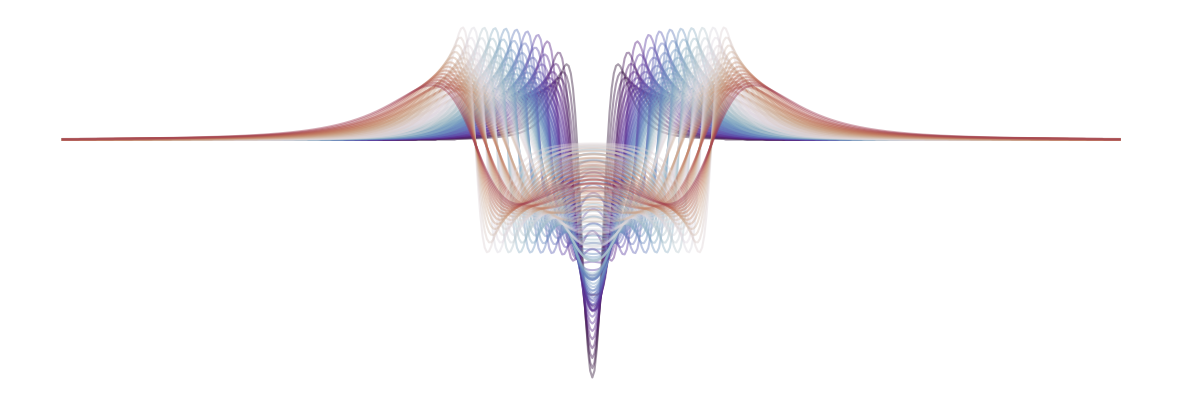

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des palettes disponibles
color_palettes = [
    'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'twilight', 'twilight_shifted',
    'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
    'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
    'GnBu', 'PuBu', 'PuBuGn', 'BuGn', 'RdBu', 'RdGy', 'PiYG', 'RdPuBu', 'PuBuRd', 'RdBuPu', 'CMRmap', 'gnuplot', 'gnuplot2', 'gist_stern'
]

def plot_atoms(atoms, palette_index=0, alpha=0.4, figsize=(15, 5)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # Sécurité pour éviter les erreurs d'index
    if palette_index >= len(color_palettes) or palette_index < 0:
        palette_index = 0  # Revenir à la palette par défaut si l'index est hors des limites

    # Déterminer les limites pour les paramètres b et y
    b_vals = [atom.b for atom in atoms]
    y_vals = [atom.y for atom in atoms]
    b_min, b_max = min(b_vals), max(b_vals)
    y_min, y_max = min(y_vals), max(y_vals)

    # Fonction de normalisation
    normalize_b = lambda b: (b - b_min) / (b_max - b_min)
    normalize_y = lambda y: (y - y_min) / (y_max - y_min)

    # Sélection de la palette de couleurs
    selected_palette = plt.cm.get_cmap(color_palettes[palette_index])

    for atom in atoms:
        norm_b = normalize_b(atom.b)
        norm_y = normalize_y(atom.y)
        # Combinaison linéaire simple pour la couleur basée sur les paramètres normalisés
        color_val = norm_b * 0.53 + norm_y * 0.27  # Inverser la combinaison pour obtenir des couleurs plus sombres
        ax.plot(atom(), color=selected_palette(color_val), alpha=alpha)

    plt.axis('off')
    plt.show()

# Supposer que `dictionary.getAtoms()` récupère la liste des atomes
atoms = dictionary.getAtoms()

# Appel de la fonction avec différents indices pour changer de palette
rd_bu_index = color_palettes.index('twilight_shifted')
plot_atoms(atoms, alpha=0.42, palette_index=rd_bu_index)  # Palette 'RdBu'

In [104]:
print(dictionary.getAtomsLength())

492
